In [15]:
import numpy as np
import matplotlib.pyplot as plt 

from galpy.df import streamdf
from galpy.orbit import Orbit
from galpy.potential import Potential, TwoPowerTriaxialPotential, LogarithmicHaloPotential
from galpy.actionAngle import actionAngleIsochroneApprox
from galpy.util import conversion #for unit conversions

from astropy import units as u
from astropy.constants import G
G = G.to(u.kpc*u.km**2/u.Msun/u.s**2)

In [3]:
SEED = 42
np.random.seed(SEED)

In [4]:
logM = 12
Rs   = 10
q1, q2, q3   = 0.5, 1., 1.5
x0, y0, z0 = -60, 0, 0
vx0, vy0, vz0 = 0, 125, 0
time = 3

logm = 8

In [5]:
a = Rs*q1
b = q2/q1
c = q3/q1

In [7]:
pot_halo = TwoPowerTriaxialPotential(amp=(10**logM)*u.Msun, a=a*u.kpc, b=b, c=c, zvec=None, pa=None)

aAI = actionAngleIsochroneApprox(pot=pot_halo, b=0.8)#a*u.kpc)

In [8]:
obs= Orbit([x0, y0, z0,
            vx0, vy0, vz0])


In [9]:
0.365/220

0.001659090909090909

In [11]:
sdf= streamdf(0.365/220,
              progenitor=obs,
              pot=pot_halo,
              aA=aAI,
              leading=True,
              nTrackChunks=11,
              tdisrupt=time*u.Gyr)

/Users/davidchemaly/miniforge3/envs/Astro/lib/python3.10/site-packages/galpy/actionAngle/actionAngleIsochrone.py:253: RuntimeWarning: invalid value encountered in sqrt
  Jr = self.amp / numpy.sqrt(-2.0 * E) - 0.5 * (

/Users/davidchemaly/miniforge3/envs/Astro/lib/python3.10/site-packages/galpy/actionAngle/actionAngleIsochrone.py:257: RuntimeWarning: invalid value encountered in power
  Omegar = (-2.0 * E) ** 1.5 / self.amp

/Users/davidchemaly/miniforge3/envs/Astro/lib/python3.10/site-packages/galpy/actionAngle/actionAngleIsochrone.py:282: RuntimeWarning: invalid value encountered in sqrt
  numpy.sqrt((1.0 + e) / (1.0 - e)) * numpy.tan(0.5 * eta)

/Users/davidchemaly/miniforge3/envs/Astro/lib/python3.10/site-packages/galpy/actionAngle/actionAngleIsochrone.py:285: RuntimeWarning: invalid value encountered in sqrt
  numpy.sqrt((1.0 + e + 2.0 * self.b / c) / (1.0 - e + 2.0 * self.b / c))

/Users/davidchemaly/miniforge3/envs/Astro/lib/python3.10/site-packages/galpy/actionAngle/actionAngleI

IndexError: tuple index out of range

In [41]:
# lp = LogarithmicHaloPotential(normalize=1.,q=0.9)
lp = TwoPowerTriaxialPotential(amp=(10**logM)*u.Msun, a=a*u.kpc, b=b, c=c, zvec=None, pa=None)
aAI = actionAngleIsochroneApprox(pot=pot_halo, b=0.8)#a*u.kpc)
aAI= actionAngleIsochroneApprox(pot=lp,b=0.8)

obs= Orbit([1.56148083,0.35081535,-1.15481504,0.88719443,-0.47713334,0.12019596])

sigv = 10 #km/s
time = 2 # Gyr
sdf= streamdf(sigv/220.,progenitor=obs,pot=lp,aA=aAI, leading=True, nTrackChunks=11,tdisrupt=time/conversion.time_in_Gyr(220.,8.))

sdf.plotCompareTrackAAModel()

/Users/davidchemaly/miniforge3/envs/Astro/lib/python3.10/site-packages/galpy/actionAngle/actionAngleIsochrone.py:253: RuntimeWarning: invalid value encountered in sqrt
  Jr = self.amp / numpy.sqrt(-2.0 * E) - 0.5 * (

/Users/davidchemaly/miniforge3/envs/Astro/lib/python3.10/site-packages/galpy/actionAngle/actionAngleIsochrone.py:257: RuntimeWarning: invalid value encountered in power
  Omegar = (-2.0 * E) ** 1.5 / self.amp

/Users/davidchemaly/miniforge3/envs/Astro/lib/python3.10/site-packages/galpy/actionAngle/actionAngleIsochrone.py:282: RuntimeWarning: invalid value encountered in sqrt
  numpy.sqrt((1.0 + e) / (1.0 - e)) * numpy.tan(0.5 * eta)

/Users/davidchemaly/miniforge3/envs/Astro/lib/python3.10/site-packages/galpy/actionAngle/actionAngleIsochrone.py:285: RuntimeWarning: invalid value encountered in sqrt
  numpy.sqrt((1.0 + e + 2.0 * self.b / c) / (1.0 - e + 2.0 * self.b / c))



LinAlgError: Array must not contain infs or NaNs

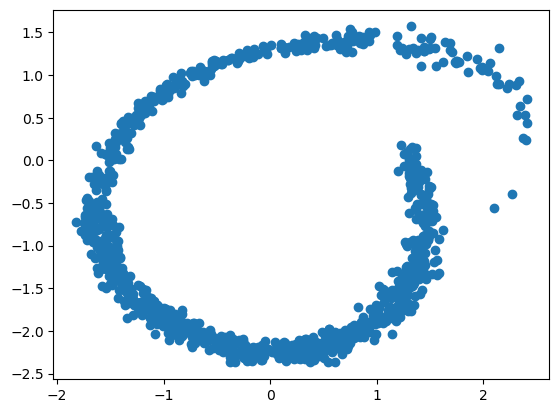

In [40]:
lb = sdf.sample(n=1000,xy=True)
plt.scatter(lb[0],lb[1])

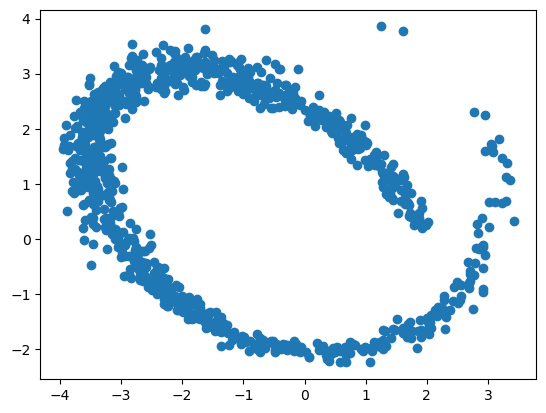

In [38]:
lb = sdf.sample(n=1000,xy=True)
plt.scatter(lb[0],lb[1])